In [1]:
#Humanitarian Aid + Covid Risk Assessment

# 1. Categorize all Countries that need humanitarian aid
# 2. Store all these countries with their respective variables
# 3. Find the data about Covid Risk in Countries - this might also include vaccination rates etc.
# 4. Combine the the Covid Risk of a Country + How much aid is needed to calculate a priority queue of where aid needs to go

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
humanitarian_data = "https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Humanitarian%20Data/data-cRsVz.csv"
humanitarian_dataframe = pd.read_csv(humanitarian_data)

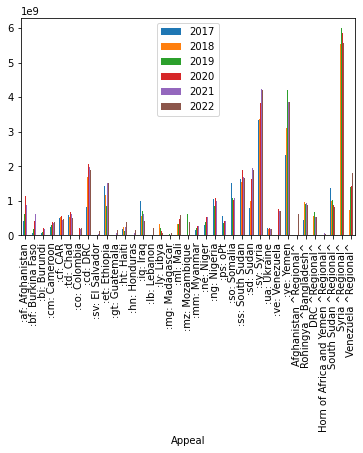

                                 Appeal  Type  People in need  \
0                      :af: Afghanistan   HRP        24400000   
1                     :bf: Burkina Faso   HRP         3535864   
2                          :bi: Burundi   HRP         1780000   
3                         :cm: Cameroon   HRP         4000000   
4                              :cf: CAR   HRP         3100000   
5                             :td: Chad   HRP         5500000   
6                         :co: Colombia   HRP         7700000   
7                              :cd: DRC   HRP        27030000   
8                      :sv: El Salvador   HRP         1700000   
9                         :et: Ethiopia   HRP        25900000   
10                       :gt: Guatemala   HRP         3800000   
11                           :ht: Haiti   HRP         4900000   
12                        :hn: Honduras   HRP         2800000   
13                            :iq: Iraq   HRP         2500000   
14                       

In [4]:
df = pd.DataFrame(humanitarian_dataframe,columns=['2017','2018','2019', '2020', '2021', '2022', 'Appeal'])
df.plot(x='Appeal', y=['2017','2018','2019','2020','2021','2022'], kind="bar")
#df.plot(x ='Unemployment_Rate', y='Stock_Index_Price', kind = 'scatter')
plt.show()

print(humanitarian_dataframe)

In [5]:
print(humanitarian_dataframe.head())

              Appeal Type  People in need  People targeted  \
0   :af: Afghanistan  HRP        24400000         22100000   
1  :bf: Burkina Faso  HRP         3535864          3006940   
2       :bi: Burundi  HRP         1780000           947000   
3      :cm: Cameroon  HRP         4000000          2800000   
4           :cf: CAR  HRP         3100000          2000000   

   Requirements (US$)         2017         2018         2019          2020  \
0          4440000000  409413812.0  598923998.0  611759986.0  1.131051e+09   
1           561443902   61089000.0   90300000.0  186965134.0  4.243579e+08   
2           183000000   73700000.0  141814441.0  106286557.0  1.978930e+08   
3           371500000  238094671.0  319676453.0  298882369.0  3.909201e+08   
4           461300000  497300000.0  515600000.0  430700000.0  5.536223e+08   

          2021        2022  
0  868666483.0  4440000000  
1  607875894.0   600000000  
2  194684000.0   183000000  
3  361554315.0   371500000  
4  444760000.

In [6]:
covid_data = "https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Humanitarian%20Data/data.csv"
covid_df = pd.read_csv(covid_data)
# Risk Level: [1, 2, 3, 4]
# 1: <1 
# 2: 1-9
# 3: 10-24
# 4: 25+
# Source: https://globalepidemics.org/key-metrics-for-covid-suppression/

In [7]:
print(covid_df)

           country country_code continent  population indicator  weekly_count  \
0      Afghanistan          AFG      Asia    38928341     cases           0.0   
1      Afghanistan          AFG      Asia    38928341     cases           0.0   
2      Afghanistan          AFG      Asia    38928341     cases           0.0   
3      Afghanistan          AFG      Asia    38928341     cases           0.0   
4      Afghanistan          AFG      Asia    38928341     cases           0.0   
...            ...          ...       ...         ...       ...           ...   
48517     Zimbabwe          ZWE    Africa    14862927    deaths           5.0   
48518     Zimbabwe          ZWE    Africa    14862927    deaths          15.0   
48519     Zimbabwe          ZWE    Africa    14862927    deaths          13.0   
48520     Zimbabwe          ZWE    Africa    14862927    deaths          11.0   
48521     Zimbabwe          ZWE    Africa    14862927    deaths           8.0   

      year_week  rate_14_da

In [8]:
counter = 0 

#Country: [Cases per 100,000, Risk Level]
countriesCurrentCases = {}
mostRecentDate = '2022-13'

for dates in covid_df['year_week']:
  if mostRecentDate == dates: 
    if covid_df['indicator'][counter] == 'cases' and pd.notnull(covid_df['country_code'][counter]):

      countriesCurrentCases[covid_df['country'][counter]] = [covid_df['rate_14_day'][counter]]

      if covid_df['rate_14_day'][counter] >= 25:
        countriesCurrentCases[covid_df['country'][counter]].append(4)
      elif covid_df['rate_14_day'][counter] >= 10:
        countriesCurrentCases[covid_df['country'][counter]].append(3)
      elif covid_df['rate_14_day'][counter] >= 1:
        countriesCurrentCases[covid_df['country'][counter]].append(2)
      else:
        countriesCurrentCases[covid_df['country'][counter]].append(1)
  counter+=1

print(countriesCurrentCases)

{'Afghanistan': [1.8135887167655047, 2], 'Albania': [27.4775953941647, 4], 'Algeria': [0.3055799607776718, 1], 'American Samoa': [4983.966519919561, 4], 'Andorra': [1037.0584297097548, 4], 'Angola': [0.5507166192401279, 1], 'Anguilla': [706.5724570057325, 4], 'Antigua And Barbuda': [20.42316804182665, 3], 'Argentina': [69.93352498398247, 4], 'Armenia': [8.537968989286705, 2], 'Aruba': [230.41043028679545, 4], 'Australia': [3037.8024117053724, 4], 'Austria': [4507.944218803505, 4], 'Azerbaijan': [5.710523785219212, 2], 'Bahamas': [15.766132313451054, 3], 'Bahrain': [669.3766921742871, 4], 'Bangladesh': [0.7049634766073536, 1], 'Barbados': [821.2380511603467, 4], 'Belarus': [147.05818545057363, 4], 'Belgium': [1285.8821569042668, 4], 'Belize': [36.71838258039691, 4], 'Benin': [0.0, 1], 'Bermuda': [534.7421836108747, 4], 'Bhutan': [1222.5056116286423, 4], 'Bolivia': [22.796139716606547, 3], 'Bonaire, Saint Eustatius And Saba': [3218.794096334999, 4], 'Bosnia And Herzegovina': [44.47065744

In [9]:
print(humanitarian_dataframe['Appeal'])

0                        :af: Afghanistan
1                       :bf: Burkina Faso
2                            :bi: Burundi
3                           :cm: Cameroon
4                                :cf: CAR
5                               :td: Chad
6                           :co: Colombia
7                                :cd: DRC
8                        :sv: El Salvador
9                           :et: Ethiopia
10                         :gt: Guatemala
11                             :ht: Haiti
12                          :hn: Honduras
13                              :iq: Iraq
14                           :lb: Lebanon
15                             :ly: Libya
16                        :mg: Madagascar
17                              :ml: Mali
18                        :mz: Mozambique
19                           :mm: Myanmar
20                             :ne: Niger
21                           :ng: Nigeria
22                               :ps: oPt
23                           :so: 

In [10]:
countryList = humanitarian_dataframe['Appeal']

temp = []
temp2=[]
temp3 = []
for x in countryList:
  temp3.append(x.lstrip())
for country in countriesCurrentCases:
  if country not in temp3:
    for data in countriesCurrentCases[country]:
      temp.append(data)
    temp2.append(temp.pop())

In [11]:
print(temp)
print(temp2)
len(temp2)

[1.8135887167655047, 27.4775953941647, 0.3055799607776718, 4983.966519919561, 1037.0584297097548, 0.5507166192401279, 706.5724570057325, 20.42316804182665, 69.93352498398247, 8.537968989286705, 230.41043028679545, 3037.8024117053724, 4507.944218803505, 5.710523785219212, 15.766132313451054, 669.3766921742871, 0.7049634766073536, 821.2380511603467, 147.05818545057363, 1285.8821569042668, 36.71838258039691, 0.0, 534.7421836108747, 1222.5056116286423, 22.796139716606547, 3218.794096334999, 44.47065744334868, 0.0, 168.3496400763892, 122.36663690180904, 2512.097612935817, 240.797573812318, 0.215277240249113, 1.707204934646429, 3.959573827839046, 0.4897184736575159, 298.71636642283056, 6.2950998942423215, 410.8338405356056, 0.0, 0.2496064284978947, 464.35985293946095, 3.629065325228207, 9.028576289032674, 1.839936982158361, 0.1630998540799972, 8318.150762924162, 161.28418013417053, 0.3942638402245788, 461.2429509396488, 96.8073783025751, 578.3059110298599, 6649.061660688847, 856.812443010943

220

In [12]:
One1=0
Two1=0
Three1=0
Four1=0
for items in temp2:
  if(items==1):
    One1+=1
  elif(items==2):
    Two1+=1
  elif(items==3):
    Three1+=1
  else:
    Four1+=1

[0.20909090909090908, 0.1590909090909091, 0.08636363636363636, 0.5454545454545454]


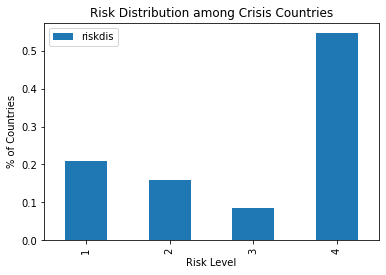

In [13]:
riskdis1 = []
riskdis1.append(One1/len(temp2))
riskdis1.append(Two1/len(temp2))
riskdis1.append(Three1/len(temp2))
riskdis1.append(Four1/len(temp2))

risklevel = [1,2,3,4]
print(riskdis1)
df = pd.DataFrame()
df['riskdis'] = riskdis1
df['risklevel'] = risklevel

df = pd.DataFrame(df,columns=['riskdis', 'risklevel'])
df.plot(x='risklevel', y='riskdis', kind="bar")
plt.title('Risk Distribution among Crisis Countries')
plt.ylabel('% of Countries')
plt.xlabel('Risk Level')
plt.show()

In [14]:
countryList = []
casesList = []
riskLVL = []
dictionary = {}
counter=0
for country in countriesCurrentCases:
  countryList.append(country)
  for data in countriesCurrentCases[country]:
    casesList.append(data)
  riskLVL.append(casesList.pop())

dictionary['Country']=countryList
dictionary['Cases']=casesList
dictionary['Level of Risk']=riskLVL

covidRisk = pd.DataFrame(dictionary)

covidRisk = covidRisk.sort_values(by='Cases', ascending=False)

humanitarian_dataframe = humanitarian_dataframe.rename(columns = {'Appeal': 'Country'})

for country in humanitarian_dataframe['Country']:
    Splitter = country.split(':')

    if(len(Splitter)==3):
      humanitarian_dataframe=humanitarian_dataframe.replace(country,Splitter[2].rstrip(), regex = True) 
humanitarian_dataframe=humanitarian_dataframe.drop([30,31,32,33,34,35,36])

print(covidRisk)







                              Country        Cases  Level of Risk
184                       South Korea  8618.415082              4
46                       Cook Islands  8318.150763              4
84                           Guernsey  6837.500776              4
52                             Cyprus  6649.061661              4
3                      American Samoa  4983.966520              4
..                                ...          ...            ...
130  Micronesia (Federated States Of)     0.000000              1
182                           Somalia     0.000000              1
89                           Holy See     0.000000              1
176                      Sierra Leone     0.000000              1
68                      Faroe Islands     0.000000              1

[220 rows x 3 columns]


In [15]:
newFrame = humanitarian_dataframe.join(covidRisk, lsuffix=('Country'))

counter=0
calcValue = []
for risks in newFrame['Level of Risk']:
  calcValue.append(risks*newFrame['People in need'][counter])
  counter+=1

newFrame['Caculated Risk']=calcValue

newFrame=newFrame.drop(columns=['Country'])
newFrame=newFrame.rename(columns = {'CountryCountry': 'Country'})
newFrame

,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000
1,Burkina Faso,HRP,3535864,3006940,561443902,6.108900e+07,9.030000e+07,1.869651e+08,4.243579e+08,6.078759e+08,600000000,27.477595,4,14143456
2,Burundi,HRP,1780000,947000,183000000,7.370000e+07,1.418144e+08,1.062866e+08,1.978930e+08,1.946840e+08,183000000,0.305580,1,1780000
3,Cameroon,HRP,4000000,2800000,371500000,2.380947e+08,3.196765e+08,2.988824e+08,3.909201e+08,3.615543e+08,371500000,4983.966520,4,16000000
4,CAR,HRP,3100000,2000000,461300000,4.973000e+08,5.156000e+08,4.307000e+08,5.536223e+08,4.447600e+08,461300000,1037.058430,4,12400000
5,Chad,HRP,5500000,3500000,500000000,5.886083e+08,5.437692e+08,4.766412e+08,6.646412e+08,6.175224e+08,500000000,0.550717,1,5500000
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000
8,El Salvador,HRP,1700000,912200,114343302,NaN,NaN,NaN,NaN,4.215670e+07,114343302,69.933525,4,6800000
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000


In [16]:
newFrame = newFrame.sort_values(by=['Caculated Risk'], ascending = False)
newFrame

,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk
29,Yemen,HRP,20700000,16000000,3850000000,2.338796e+09,3.108068e+09,4.192680e+09,3.382682e+09,3.853456e+09,3850000000,122.366637,4,82800000
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000
19,Myanmar,HRP,14400000,6200000,826000000,1.503000e+08,1.834000e+08,2.143600e+08,2.753000e+08,2.764559e+08,826000000,1285.882157,4,57600000
25,Sudan,HRP,14300000,10900000,1900000000,8.039662e+08,1.007555e+09,1.149289e+09,1.633403e+09,1.939815e+09,1900000000,3218.794096,4,57200000
26,Syria,HRP,14000000,12000000,4200000000,3.351304e+09,3.364411e+09,3.293416e+09,3.817533e+09,4.224417e+09,4200000000,44.470657,4,56000000
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000
23,Somalia,HRP,7700000,5500000,1500000000,1.507847e+09,1.717890e+09,1.077453e+09,1.009927e+09,1.092122e+09,1500000000,1222.505612,4,30800000
28,Venezuela,HRP,7000000,4500000,708100000,NaN,NaN,2.227244e+08,7.625094e+08,7.080981e+08,708100000,168.349640,4,28000000


In [17]:
#Correlation of 4's to need for Humanitarian aid
One=0
Two=0
Three=0
Four=0
for items in riskLVL:
  if(items==1):
    One+=1
  elif(items==2):
    Two+=1
  elif(items==3):
    Three+=1
  else:
    Four+=1
print(Four/len(riskLVL)*100,'% of the countries that most need humanitarian aids are at a Level 4 risk for COVID')
print(Three/len(riskLVL)*100,'% of the countries that most need humanitarian aids are at a Level 3 risk for COVID')
print(Two/len(riskLVL)*100,'% of the countries that most need humanitarian aids are at a Level 2 risk for COVID')
print(One/len(riskLVL)*100,'% of the countries that most need humanitarian aids are at a Level 1 risk for COVID')

54.54545454545454 % of the countries that most need humanitarian aids are at a Level 4 risk for COVID
8.636363636363637 % of the countries that most need humanitarian aids are at a Level 3 risk for COVID
15.909090909090908 % of the countries that most need humanitarian aids are at a Level 2 risk for COVID
20.909090909090907 % of the countries that most need humanitarian aids are at a Level 1 risk for COVID


[0.20909090909090908, 0.1590909090909091, 0.08636363636363636, 0.5454545454545454]


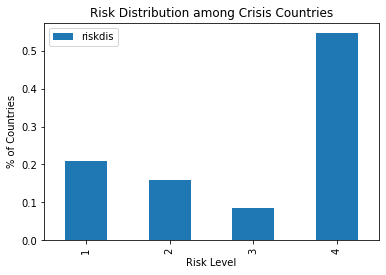

In [18]:
riskdis = []
riskdis.append(One/len(riskLVL))
riskdis.append(Two/len(riskLVL))
riskdis.append(Three/len(riskLVL))
riskdis.append(Four/len(riskLVL))

risklevel = [1,2,3,4]
print(riskdis)
df = pd.DataFrame()
df['riskdis'] = riskdis
df['risklevel'] = risklevel

df = pd.DataFrame(df,columns=['riskdis', 'risklevel'])
df.plot(x='risklevel', y='riskdis', kind="bar")
plt.title('Risk Distribution among Crisis Countries')
plt.ylabel('% of Countries')
plt.xlabel('Risk Level')
plt.show()


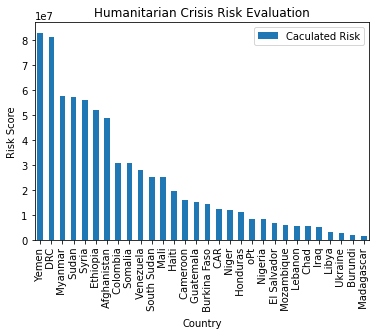

In [19]:
df = pd.DataFrame(newFrame,columns=['Country', 'Caculated Risk'])
df.plot(x='Country', y='Caculated Risk', kind="bar")
plt.title('Humanitarian Crisis Risk Evaluation')
plt.ylabel('Risk Score')
plt.show()

In [20]:
sumOfCalcRisk = 0
calcRiskList = []
percentOfRisk = []
for riskValue in newFrame['Caculated Risk']:
  sumOfCalcRisk+=riskValue
  calcRiskList.append(riskValue)

for values in calcRiskList:
  percentOfRisk.append(round(((values/sumOfCalcRisk)*100),2))

newFrame['Percentage of Aid Needed']=percentOfRisk

newFrame






,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk,Percentage of Aid Needed
29,Yemen,HRP,20700000,16000000,3850000000,2.338796e+09,3.108068e+09,4.192680e+09,3.382682e+09,3.853456e+09,3850000000,122.366637,4,82800000,11.33
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000,11.09
19,Myanmar,HRP,14400000,6200000,826000000,1.503000e+08,1.834000e+08,2.143600e+08,2.753000e+08,2.764559e+08,826000000,1285.882157,4,57600000,7.88
25,Sudan,HRP,14300000,10900000,1900000000,8.039662e+08,1.007555e+09,1.149289e+09,1.633403e+09,1.939815e+09,1900000000,3218.794096,4,57200000,7.82
26,Syria,HRP,14000000,12000000,4200000000,3.351304e+09,3.364411e+09,3.293416e+09,3.817533e+09,4.224417e+09,4200000000,44.470657,4,56000000,7.66
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000,7.09
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000,6.68
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000,4.21
23,Somalia,HRP,7700000,5500000,1500000000,1.507847e+09,1.717890e+09,1.077453e+09,1.009927e+09,1.092122e+09,1500000000,1222.505612,4,30800000,4.21
28,Venezuela,HRP,7000000,4500000,708100000,NaN,NaN,2.227244e+08,7.625094e+08,7.080981e+08,708100000,168.349640,4,28000000,3.83
